# Making Recommendations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from data.movies import critics, critic_names, movie_names
import random

p1, p2 = random.choices(critic_names, k=2)
space = [ ]
for film in movie_names:
    try:
        space.append( (critics[p1][film], critics[p2][film]) )
    except KeyError: 
        # at least one of critics did not review this movie
        pass

Text(0, 0.5, 'Jack Matthews')

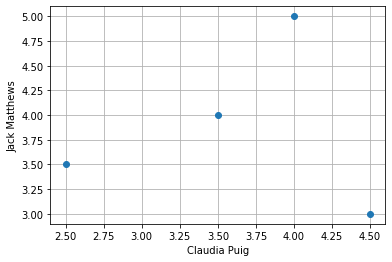

In [3]:
plt.plot( *list(zip(*space)), "o")
plt.grid(True)
plt.xlabel(p1)
plt.ylabel(p2)

## Euclidean Distance Score

In [4]:
from recommendations import similarity_distance

similarity_distance("Lisa Rose", "Gene Seymour", prefs=critics)

0.29429805508554946

In [5]:
similarity = np.array([ [similarity_distance(p1, p2, prefs=critics) for p2 in critic_names] for p1 in critic_names ])

0         Claudia Puig ['1.00', '0.28', '0.32', '0.39', '0.54', '0.31', '0.36']
1         Gene Seymour ['0.28', '1.00', '0.67', '0.29', '0.34', '0.28', '0.26']
2        Jack Matthews ['0.32', '0.67', '1.00', '0.34', '0.32', '0.29', '0.27']
3            Lisa Rose ['0.39', '0.29', '0.34', '1.00', '0.47', '0.41', '0.35']
4     Michael Phillips ['0.54', '0.34', '0.32', '0.47', '1.00', '0.39', '0.39']
5         Mick LaSalle ['0.31', '0.28', '0.29', '0.41', '0.39', '1.00', '0.40']
6                 Toby ['0.36', '0.26', '0.27', '0.35', '0.39', '0.40', '1.00']


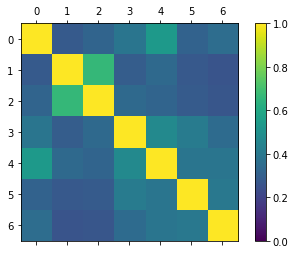

In [6]:
from matplotlib.image import AxesImage
fig, ax = plt.subplots()

im: AxesImage = ax.matshow(similarity, vmin=0, vmax=1.0)
fig.colorbar(im)
for n, name in enumerate(critic_names):
    print(n, "%20s"%name, [ "%3.2f" % s for s in similarity[n] ])

Now with pandas

In [7]:
df = pd.DataFrame(similarity)
df.style.background_gradient()

,0,1,2,3,4,5,6
0,1.000000,0.281729,0.320377,0.387426,0.535898,0.314520,0.356789
1,0.281729,1.000000,0.666667,0.294298,0.340542,0.277926,0.258246
2,0.320377,0.666667,1.000000,0.340542,0.320377,0.285714,0.267479
3,0.387426,0.294298,0.340542,1.000000,0.472136,0.414214,0.348331
4,0.535898,0.340542,0.320377,0.472136,1.000000,0.387426,0.387426
5,0.314520,0.277926,0.285714,0.414214,0.387426,1.000000,0.400000
6,0.356789,0.258246,0.267479,0.348331,0.387426,0.400000,1.000000


## Pearson Distance

In [8]:
from recommendations import similarity_pearson
similarity_pearson("Lisa Rose", "Gene Seymour", prefs=critics)

0.39605901719066977